<font color = black size = 10 >Solving linear equations using matrices</font>

suppose we have got the following equations
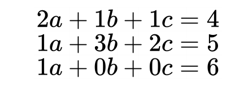
or equivalently:
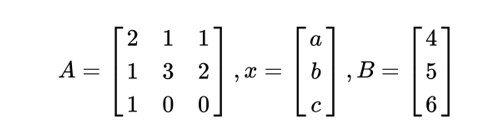
we can simply solve it using Numpy 

In [9]:
#import cell
import numpy as np
import scipy.linalg as linalg


In [4]:
matrix_A = np.array([
    [2,1,1],
    [1,3,2],
    [1,0,0]])
matrix_B = np.array([4,5,6])
x = np.linalg.solve(matrix_A, matrix_B)
print(x)

[  6.  15. -23.]


<font color = black size = 6 >LU decomposition</font>

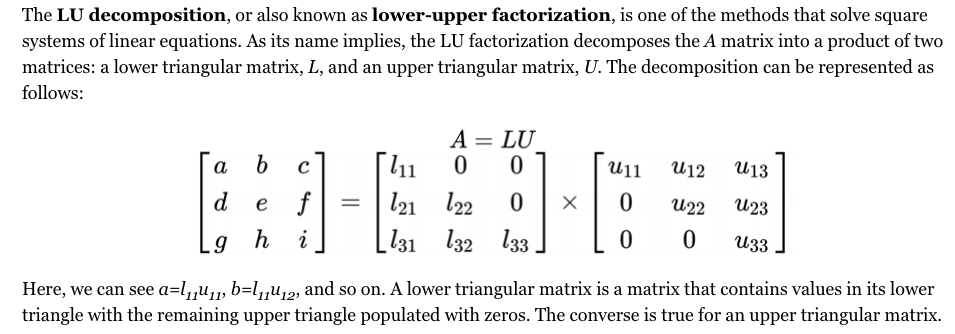!

In [14]:
matrix_A = np.array([
    [2,1,1],
    [1,3,2],
    [1,0,0]])
matrix_B = np.array([4,5,6])
LU = linalg.lu_factor(matrix_A)
x = linalg.lu_solve(LU,matrix_B)
x

array([  6.,  15., -23.])

In [17]:
P,L,U = linalg.lu(matrix_A)
print(P)
print(L)
print(U)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 1.   0.   0. ]
 [ 0.5  1.   0. ]
 [ 0.5 -0.2  1. ]]
[[ 2.   1.   1. ]
 [ 0.   2.5  1.5]
 [ 0.   0.  -0.2]]


<font color = black size = 6 >Cholesky decomposition</font>

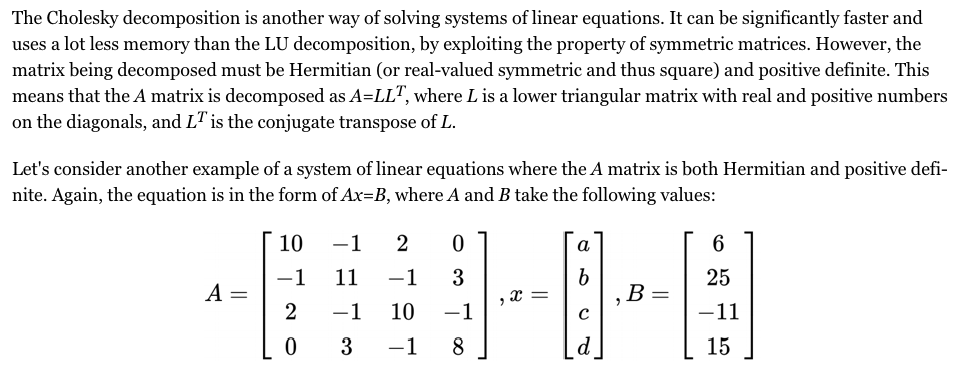

In [19]:
A = np.array([
    [10, -1, 2, 0],
    [-1, 11, -1, 3],
    [2, -1, 10, -1],
    [0, 3, -1, 8]
])
B = np.array([6, 25, -11, 15])
L = np.linalg.cholesky(A)


In [21]:
y = np.linalg.solve(L, B)
x = np.linalg.solve(L.T.conj(), y)
x

array([ 1.,  2., -1.,  1.])

<font color = black size = 6 >QR decomposition</font>
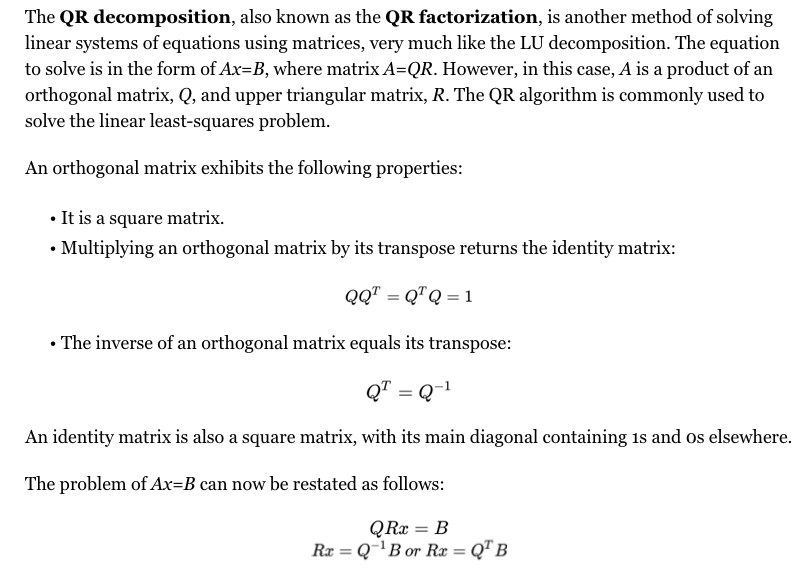

In [28]:
matrix_A = np.array([
    [2,1,1],
    [1,3,2],
    [1,0,0]])
matrix_B = np.array([4,5,6])

Q,R = linalg.qr(matrix_A)

y = np.dot(Q.T,matrix_B)
x = np.linalg.solve(R,y)
x


array([  6.,  15., -23.])

<font color = black size = 6 >Gauss Seidel</font>
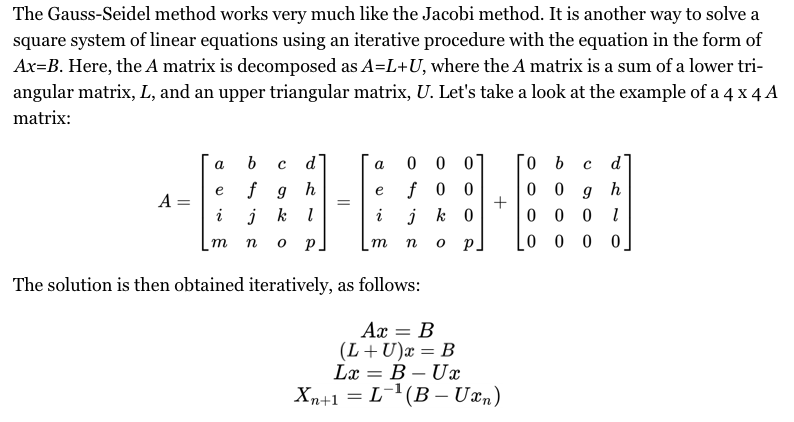

In [ ]:
def gauss(A, B, n, tol=1e-10):
    L = np.tril(A)  # returns the lower triangular matrix of A
    U = A-L  # decompose A = L + U
    L_inv = np.linalg.inv(L)
    x = np.zeros_like(B)
    for i in range(n):
        Ux = np.dot(U, x)
        x_new = np.dot(L_inv, B - Ux)
        
        if np.allclose(x, x_new, tol):
                break
        x = x_new
    return x
    


<font color = black size = 6 >Jacobian</font>
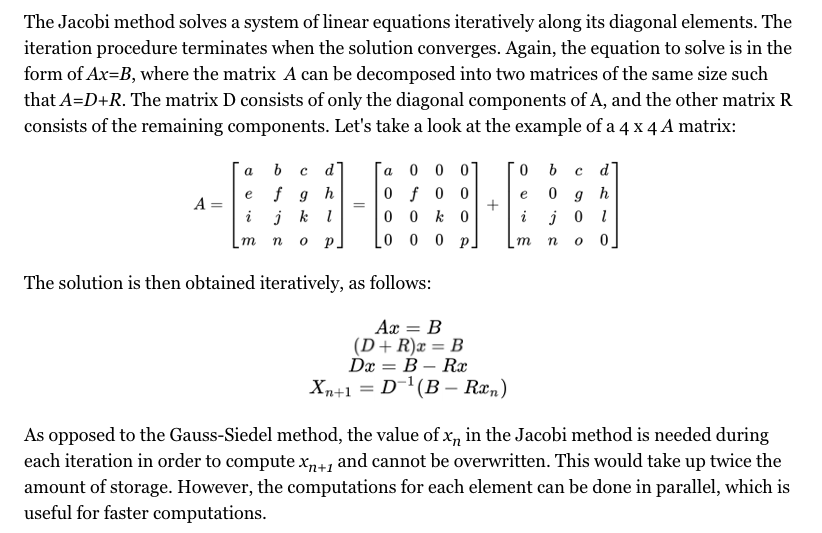

In [ ]:
def jacobian(A, B, n, tol=1e-10):
    x = np.zeros_like(B)
     for iter_count in range(n):
            x_new = np.zeros_like(x)
            
            for i in range(A.shape[0]):
                s1 = np.dot(A[i, :i], x[:i])
                s2 = np.dot(A[i, i + 1:], x[i + 1:])
                x_new[i] = (B[i] - s1 - s2) / A[i, i]
                
            if np.allclose(x, x_new, tol):
                break
            x = x_new
            return x